Checking some basic routines for Eduardo

In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
from bsmcalls import SNPnexus
from bsmcalls import operations
import bsmutils
import genome
import os
#os.environ["PYTHONPATH"] = "/mnt/c/Users/emaur/Dropbox (MIT)/Walsh Lab/SCZ_SNV/bsm/"
os.chdir(bsmutils.get_bsmdir())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = SNPnexus.load_data('results/2020-09-07-annotations/annotated-calls.p')
sczgwasloci = genome.read_scz_gwas()
data = genome.annotate_with_gwas_loci(data, gwas=sczgwasloci, modify_return_data=True)
clozukpath = 'resources/CLOZUK/supp-table-4.csv'
gwasgenes = operations.get_geneset(df=pd.read_csv(clozukpath, skiprows=7), col='Gene(s) tagged')

In [20]:
repr(gwasgenes)

"{'TCF20', 'SHISA8', 'GOLGA2P7', 'ZSWIM6', 'LOC101929829', 'WBP2NL', 'PPP2R3A', 'NDUFA6', 'SIPA1', 'LOC100505474', 'C16orf86', 'MARS2', 'MAPK3', 'LOC103171574', 'DPYD-AS1', 'IGSF9B', 'MIR5088', 'GOLGA6L4', 'MPPED2', 'PPAPDC1B', 'GRIN2A', 'C14orf2', 'KDM4A', 'SHMT2', 'HS3ST5', 'NUTF2', 'TM6SF2', 'MIR6889', 'C10orf32', 'MIR33A', 'U80770', 'EP300-AS1', 'GOLGA6L9', 'ARL14EP', 'ABCB9', 'MEF2C-AS1', 'CPT1C', 'CPEB1', 'GABBR2', 'C11orf31', 'STAR', 'ATG13', 'SEMA6D', 'SLC7A6', 'CKAP5', 'SERPINC1', 'NCK1-AS1', 'LOC101927839', 'PPP2R2A', 'SATB2', 'FTCDNL1', 'NCK1', 'LUZP2', 'NAGA', 'RWDD2A', 'CCDC175', 'SUGP1', 'PGM3', 'PLEKHO1', 'PCNXL3', 'NT5C2', 'SRR', 'PLCH2', 'ALMS1P', 'TMEM219', 'KCNG2', 'RPS19BP1', 'xMHC', 'ZNF823', 'SLC35G2', 'BTBD18', 'LOC102724034', 'ESAM', 'CACNB2', 'SFMBT1', 'GRM3', 'IMMP2L', 'CHRNB4', 'EPHX2', 'VRK2', 'SNORD63', 'TLE3', 'R3HDM2', 'LINC00933', 'PLCB2', 'SLC32A1', 'NCAN', 'BAG4', 'HSPA9', 'MIR4655', 'KCNK7', 'C16orf92', 'YJEFN3', 'PSMB10', 'ERCC4 ', 'RLTPR', 'ACD', 'P

In [10]:
genesets = {'SCZ GWAS': gwasgenes}
querydict = {'near_gens_Overlapped Gene': genesets}
results = operations.multiquery(querydict, data, do_sum=False, do_sort=False)
summary = operations.summarize_query_results(results, data, chisq=False, margin=False)
summary#.style.bar(subset='chisq stat')

,Dx,Control,SCZ,ASD
Feature,Query,,,
near_gens_Overlapped Gene,SCZ GWAS,20,66,42


<AxesSubplot:>

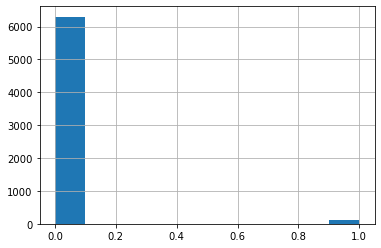

In [14]:
results[('near_gens_Overlapped Gene', 'SCZ GWAS')].hist()

In [18]:
res = pd.concat([results, data[['near_gens_Overlapped Gene']]], axis=1)
res.to_csv('results/2021-06-25-reproduce/results.csv')

In [ ]:
%connect_info